# Gaussian experiment
All data is generated on the fly

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import scipy.stats
import os
import sobol
import resource
import json
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""


Using TensorFlow backend.


# Setup

In [4]:
def generate_sobol_points(M, dim):
    points = []
    for i in range(M):
        points.append(sobol.i4_sobol(dim,i)[0])
    return np.array(points)

dims = [6]
dim = 6
M = int(2**20)

data_sources = {}
for dim in dims: 
    data_sources["QMC Sobol %d dims" % dim] = generate_sobol_points(M, dim)

    
def sine_functional(x):
    return np.sum(np.sin(4*np.pi*x), 1)

def sine_functional_1(x):
    return np.sum(np.sin(4*np.pi*x)/np.arange(1, dim+1), 1)

def sine_functional_3(x):
    return np.sum(np.sin(4*np.pi*x)/np.arange(1,dim+1)**3, 1)

functionals = {
               "Sine" : sine_functional,
               "Sine/d" : sine_functional_1,
               "Sine/d3" : sine_functional_3
            
               }

network_width = 12
network_depth = 10
    
gaussian_network =  [network_width for k in range(network_depth)]
gaussian_network.append(1)

epochs = 500000

print(gaussian_network)
console_log(gaussian_network)


[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1]


# Network sizes

In [5]:


for data_source_name in data_sources.keys():
   
    for functional_name in functionals.keys():
        title = '%s %s' % (data_source_name, functional_name)
        display(HTML("<h1>%s</h1>" % title))
        try_best_network_sizes(parameters=data_sources[data_source_name], 
                           samples=functionals[functional_name](data_sources[data_source_name]),
                           base_title=title)

Config 4 x 6 ([0 x 0] / [5 x 5])


KeyboardInterrupt: 

# Single network


Training took 17.26738429069519 seconds


../python/machine_learning.py:866: RuntimeWarning: divide by zero encountered in double_scalars
  'speedup_mean_bilevel' : lambda x, all_data: abs(np.var(all_data)/np.var(all_data[:min(train_size, x.shape[0])]-x[:min(train_size, x.shape[0])])),
../python/machine_learning.py:866: RuntimeWarning: divide by zero encountered in double_scalars
  'speedup_mean_bilevel' : lambda x, all_data: abs(np.var(all_data)/np.var(all_data[:min(train_size, x.shape[0])]-x[:min(train_size, x.shape[0])])),
../python/machine_learning.py:866: RuntimeWarning: divide by zero encountered in double_scalars
  'speedup_mean_bilevel' : lambda x, all_data: abs(np.var(all_data)/np.var(all_data[:min(train_size, x.shape[0])]-x[:min(train_size, x.shape[0])])),
../python/machine_learning.py:866: RuntimeWarning: divide by zero encountered in double_scalars
  'speedup_mean_bilevel' : lambda x, all_data: abs(np.var(all_data)/np.var(all_data[:min(train_size, x.shape[0])]-x[:min(train_size, x.shape[0])])),


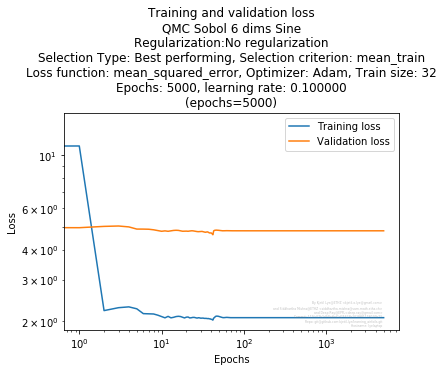


Training took 16.83901071548462 seconds


In [ ]:

for data_source_name in data_sources.keys():
    sampling_method = 'QMC'
    if 'Monte' in data_source_name:
        sampling_method='MC'
    for functional_name in functionals.keys():
        title = '%s %s' % (data_source_name, functional_name)
        display(HTML("<h1>%s</h1>" % title))
        train_single_network(parameters=data_sources[data_source_name], 
                           samples=functionals[functional_name](data_sources[data_source_name]),
                         base_title=title,
                         network = gaussian_network,
                        
                         large_integration_points = None,
                         sampling_method=sampling_method)